# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## <span style="color:blue">  Numerical exercises 1</span>

### Exercise 01.1


For the compilation of the exercises we were given a pseudo-random number generator (that uses the so-called **RANdom New York University procedure (Rannyu)**). To eliminate the influence of correlations between consecutive draws from the Rannyu generator, we additionally apply the so-called **blocking method**. Say, we want to generate a certain amount $N$ of random numbers. In order to do so, we take $N$ as the number of blocks. For each block, we draw $L$ numbers from the Rannyu generator and calculate their average value. Then, this average value is taken as the correlation-free (at least approximately) random number for that block. Thus, to generate $N$ random numbers, we actually have to apply the Rannyu generator $M=N \times L$ times.

The $N$ random numbers generated using this procedure are assumed to be distributed uniformally in the interval $[0, 1)$. This assumption should be verified in this first exercise.

In order to do so, we first recall that the **expectation value** of a uniform distribution is given by:
$$\langle r \rangle = \int_0^1 r dr = 1/2.$$
To calculate the expectation value, we use $N=100$ blocks where each of them is computed from $L=1000$ draws from the Rannyu generator (requiring a total number of $M = 10^5$ draws). In the following figure, we visualize the deviation of the estimated expectation value $\langle r \rangle$ from its theoretical value of $1/2$ as a function of the number of blocks $N$. The estimated expectation value is calculated using a progressive mean.
We observe that the uncertainty (its standard deviation) on the estimate decreases with increasing number of blocks. Since the expected value of $0$ liest within the $1 \sigma$-interval of the estimated value, we conclude that the distribution from which we draw the random numbers actually has an expectation value of $1/2$.

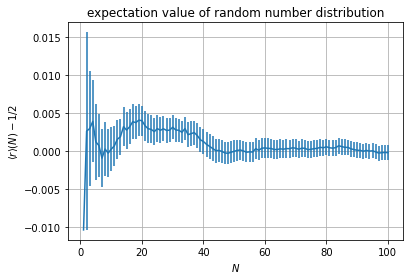

In [32]:
import numpy as np
import matplotlib.pyplot as plt

N, r_mean, r_mean_std = np.loadtxt("data/1_r_vs_N.txt", delimiter=',', skiprows=1, unpack = 'True')
plt.errorbar(N, r_mean - 1/2, r_mean_std)
plt.xlabel(r"$N$")
plt.ylabel(r"$\langle r \rangle(N) - 1/2$")
plt.title("expectation value of random number distribution")
plt.grid()

plt.show()

In the next step, we recall that the **variance** $\sigma^2$ of a uniform distribution can be computed to:
$$\sigma^2 = \langle (r - \langle r \rangle)^2 \rangle = \int_0^1 (r-1/2)^2 dr = 1/12,$$
where we used that $\langle r \rangle = 1/2$. Below, we plot the deviation of the estimated variance $\langle (r - \langle r \rangle)^2 \rangle$ from its expected value of $1/12$ against number of blocks $N$, as we did above for the expectation value. We observe that the the variance of the distribution of the random number generator is in agreement with a uniform distribution.

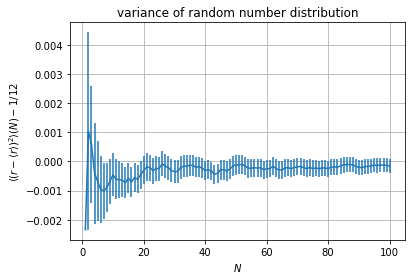

In [33]:
N, r_var, r_var_std = np.loadtxt("data/1_var_vs_N.txt", delimiter=',', skiprows=1, unpack = 'True')
plt.errorbar(N, r_var - 1/12, r_var_std)
plt.xlabel(r"$N$")
plt.ylabel(r"$\langle (r - \langle r \rangle)^2 \rangle(N) - 1/12$")
plt.title("variance of random number distribution")
plt.grid()

plt.show()

From

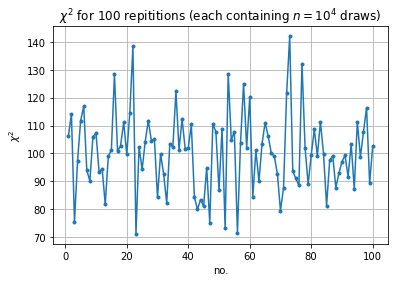

In [38]:
repeat, chi2, trash = np.loadtxt("data/1_chi2.txt", delimiter=',', skiprows=1, unpack = 'True')
plt.plot(repeat, chi2, marker='.')
plt.xlabel("no.")
plt.ylabel(r"$\chi^2$")
plt.title(r"$\chi^2$ for $100$ repititions (each containing $n=10^4$ draws)")
plt.grid()

plt.show()

### Exercise 01.2

### Exercise 01.3